In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [31]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [32]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [33]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [42]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='rbf', gamma=0.2,C=0.1) #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9684542586750788


In [43]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf',gamma=0.2,C=0.1)
#cv is cross validation
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
print(scores)

[0.91194969 0.91194969 0.96540881 0.94025157 0.95886076 0.99367089
 0.99050633 0.97468354 0.89873418 0.95253165]


In [44]:
print(scores.mean())

0.9498547090199823


[0.9577282859644933, 0.954579651301648, 0.9526809171244329, 0.9526809171244327, 0.9529953825332378, 0.9526829074118304, 0.9529973728206352, 0.9536282939256427, 0.9529953825332378, 0.9529953825332378, 0.9529953825332378, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 0.9533118382294404, 

Text(0, 0.5, 'Cross-Validated Accuracy')

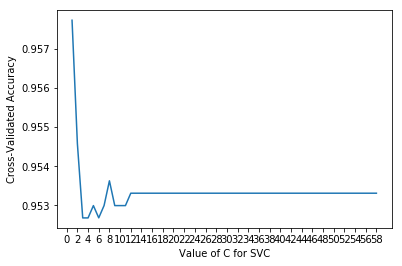

In [52]:
C_range=list(range(1,59))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', gamma=0.2,C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(range(1,59))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,60,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [50]:
gamma_range=[0.0001,0.001,0.01,0.02,0.03,0.04,0.05,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.8878114799777087, 0.9552463975798107, 0.9681514210652018, 0.9678389459437945, 0.9678349653689992, 0.9668895788551864, 0.9659382214791815, 0.9630960910755512, 0.9072366849773108, 0.5955377756548046, 0.5]


Text(0, 0.5, 'Cross-Validated Accuracy')

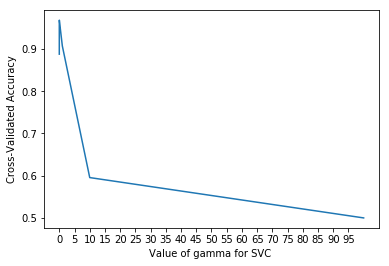

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.02,0.03,0.04,0.05,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')